# Analysis on relationship between sentiment and ESG topics

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CBSA22(Elaine)/SentiESG/ESG_combine/20_22ESGsentidata.csv', index_col='Unnamed: 0')

In [ ]:
unneeded= ['pubdate','pubdate.1','headline','content','tran_headline','tran_content','cleanText_headline','cleanText_content','sentiment_content','sentiment_headline','ESG_label_score_headline','ESG_label_score_content']
df_senti= df.drop(columns=unneeded)


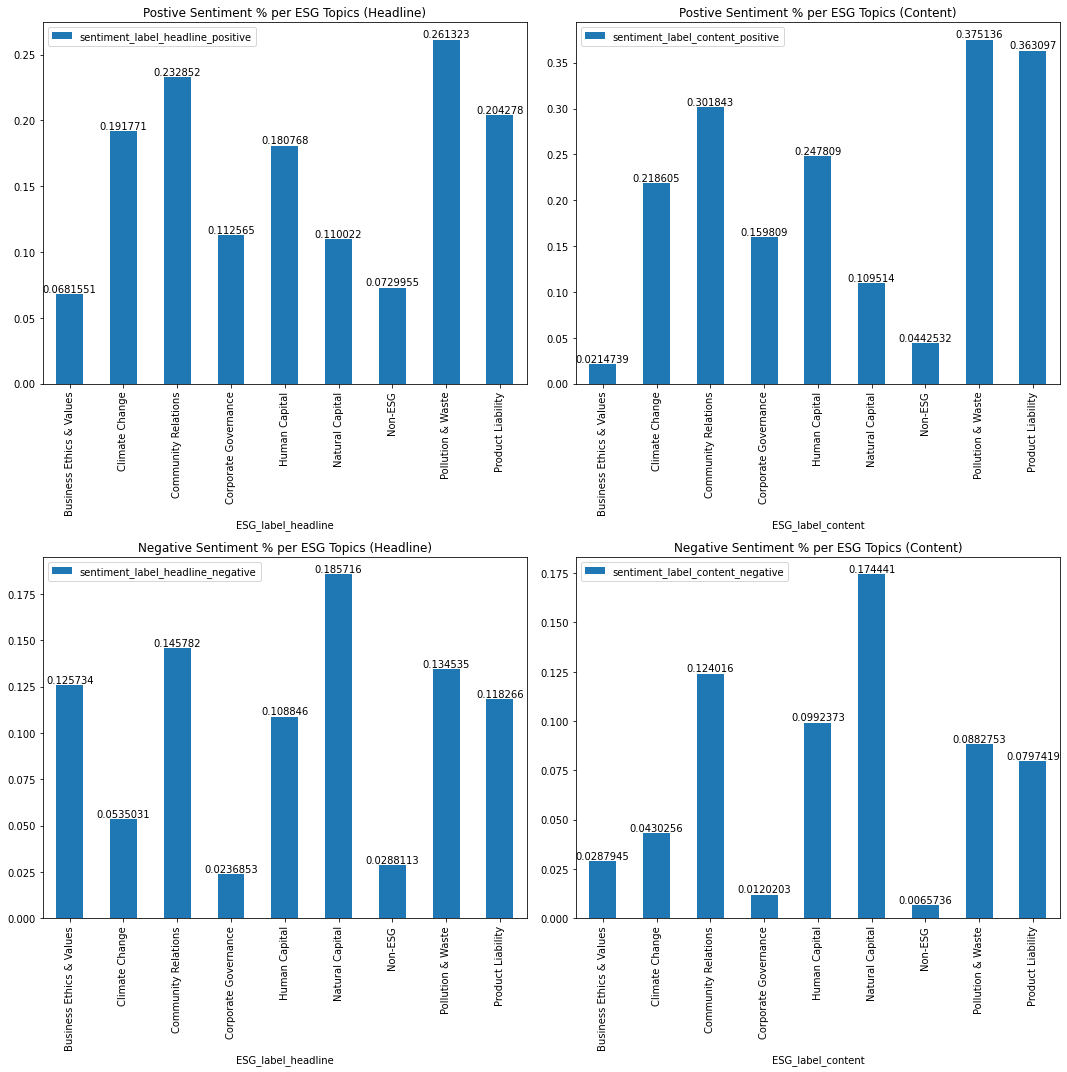

In [ ]:
df_senti_headline= df_senti[['sentiment_label_headline','ESG_label_headline']]
df_senti_content= df_senti[['sentiment_label_content','ESG_label_content']]
df_senti_headline= pd.get_dummies(df_senti_headline, columns=['sentiment_label_headline'])
df_senti_content= pd.get_dummies(df_senti_content, columns=['sentiment_label_content'])

df_senti_headline_result= df_senti_headline.groupby(by='ESG_label_headline').sum()
df_senti_headline_result['sum']=df_senti_headline_result['sentiment_label_headline_negative']+df_senti_headline_result['sentiment_label_headline_neutral']+df_senti_headline_result['sentiment_label_headline_positive']
df_senti_headline_result['sentiment_label_headline_negative']=df_senti_headline_result['sentiment_label_headline_negative']/df_senti_headline_result['sum']
df_senti_headline_result['sentiment_label_headline_neutral']=df_senti_headline_result['sentiment_label_headline_neutral']/df_senti_headline_result['sum']
df_senti_headline_result['sentiment_label_headline_positive']=df_senti_headline_result['sentiment_label_headline_positive']/df_senti_headline_result['sum']

df_senti_content_result= df_senti_content.groupby(by='ESG_label_content').sum()
df_senti_content_result['sum']=df_senti_content_result['sentiment_label_content_negative']+df_senti_content_result['sentiment_label_content_neutral']+df_senti_content_result['sentiment_label_content_positive']
df_senti_content_result['sentiment_label_content_negative']=df_senti_content_result['sentiment_label_content_negative']/df_senti_content_result['sum']
df_senti_content_result['sentiment_label_content_neutral']=df_senti_content_result['sentiment_label_content_neutral']/df_senti_content_result['sum']
df_senti_content_result['sentiment_label_content_positive']=df_senti_content_result['sentiment_label_content_positive']/df_senti_content_result['sum']

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
df_senti_headline_result.drop(columns='sum')[['sentiment_label_headline_positive']].plot.bar(ax=ax[0,0], title='Postive Sentiment % per ESG Topics (Headline)')
df_senti_headline_result.drop(columns='sum')[['sentiment_label_headline_negative']].plot.bar(ax=ax[1,0], title='Negative Sentiment % per ESG Topics (Headline)')
df_senti_content_result.drop(columns='sum')[['sentiment_label_content_positive']].plot.bar(ax=ax[0,1], title='Postive Sentiment % per ESG Topics (Content)')
df_senti_content_result.drop(columns='sum')[['sentiment_label_content_negative']].plot.bar(ax=ax[1,1], title='Negative Sentiment % per ESG Topics (Content)')

ax[0,0].bar_label(ax[0,0].containers[0])
ax[1,0].bar_label(ax[1,0].containers[0])
ax[0,1].bar_label(ax[0,1].containers[0])
ax[1,1].bar_label(ax[1,1].containers[0])
plt.tight_layout()
plt.show()

# ESG Labels with comments, like, share and engagement

In [ ]:
df_senti[['pubname','ESG_label_headline','non_view_engagements','comment_count','like_count','share_count']].loc[(df_senti['pubname']=='Facebook香港') | (df_senti['pubname']=='Instagram香港')| (df_senti['pubname']=='YouTube 香港')].groupby(by=['pubname','ESG_label_headline']).sum()


non_view_engagements  comment_count  \
pubname     ESG_label_headline                                              
Facebook香港  Business Ethics & Values                 71067         6683.0   
            Climate Change                          980568        87882.0   
            Community Relations                    2129939       171710.0   
            Corporate Governance                     86041         7920.0   
            Human Capital                           253251        18594.0   
            Natural Capital                        1225063       105581.0   
            Non-ESG                                 194465        16000.0   
            Pollution & Waste                        93417         6902.0   
            Product Liability                       211116        18162.0   
Instagram香港 Business Ethics & Values                 15704          226.0   
            Climate Change                          561319         5268.0   
            Community Relations                    1433659        20161.0   
            Corporate Governance                     24412          449.0   
            Human Capital                           198684         2683.0   
            Natural Capital                         730750         9059.0   
            Non-ESG                                  92323         1134.0   
            Pollution & Waste                       205300         2889.0   
            Product Liability                       208864         4753.0   
YouTube 香港  Business Ethics & Values                112313         6684.0   
            Climate Change                          205138        13858.0   
            Community Relations                    4706094       286823.0   
            Corporate Governance                     65105         3415.0   
            Human Capital                            99458         7428.0   
            Natural Capital                         184224        11025.0   
            Non-ESG                                  20368         1300.0   
            Pollution & Waste                        47844         2671.0   
            Product Liability                        43538         3510.0   

                                      like_count  share_count  
pubname     ESG_label_headline                                 
Facebook香港  Business Ethics & Values     39686.0       4556.0  
            Climate Change              600180.0      84878.0  
            Community Relations        1292119.0     160421.0  
            Corporate Governance         49234.0       7718.0  
            Human Capital               158090.0      17662.0  
            Natural Capital             687749.0     101867.0  
            Non-ESG                     114194.0      15890.0  
            Pollution & Waste            55135.0       9498.0  
            Product Liability           112401.0      23706.0  
Instagram香港 Business Ethics & Values     15478.0          0.0  
            Climate Change              556051.0          0.0  
            Community Relations        1413498.0          0.0  
            Corporate Governance         23963.0          0.0  
            Human Capital               196001.0          0.0  
            Natural Capital             721691.0          0.0  
            Non-ESG                      91189.0          0.0  
            Pollution & Waste           202411.0          0.0  
            Product Liability           204111.0          0.0  
YouTube 香港  Business Ethics & Values    104964.0          0.0  
            Climate Change              190064.0          0.0  
            Community Relations        4404203.0          0.0  
            Corporate Governance         61171.0          0.0  
            Human Capital                91713.0          0.0  
            Natural Capital             171951.0          0.0  
            Non-ESG                      18873.0          0.0  
            Pollution & Waste            45038.0          0.0  
            

# ESG Labels with emoji

In [ ]:
df_senti[['pubname','ESG_label_headline','love_count','haha_count','wow_count','angry_count','sad_count']].loc[(df_senti['pubname']=='Facebook香港')].groupby(by=['pubname','ESG_label_headline']).sum()


love_count  haha_count  wow_count  \
pubname    ESG_label_headline                                            
Facebook香港 Business Ethics & Values       784.0     10215.0     1266.0   
           Climate Change               13703.0     67230.0    51859.0   
           Community Relations          38722.0    149169.0    64975.0   
           Corporate Governance           635.0     10608.0     4276.0   
           Human Capital                 3847.0     14233.0     6687.0   
           Natural Capital              37368.0    107189.0    66106.0   
           Non-ESG                       3405.0     18718.0     8267.0   
           Pollution & Waste             1442.0      5128.0     1697.0   
           Product Liability             3095.0     14024.0    16873.0   

                                     angry_count  sad_count  
pubname    ESG_label_headline                                
Facebook香港 Business Ethics & Values       3674.0     1201.0  
           Climate Change                36738.0    28301.0  
           Community Relations           78898.0   121356.0  
           Corporate Governance           2002.0     2200.0  
           Human Capital                  8999.0    18999.0  
           Natural Capital               32232.0    63803.0  
           Non-ESG                        6892.0     7510.0  
           Pollution & Waste              8146.0     4597.0  
           Product Liability              9054.0    10642.0

# Keywords and Sentiment Analysis

In [ ]:
!unzip '/content/drive/MyDrive/CBSA 2022/Key word data/Sort by Content (chinese text)/Chi_Key_words (2).zip'
# pip install matplotlib --upgrade

Archive:  /content/drive/MyDrive/CBSA 2022/Key word data/Sort by Content (chinese text)/Chi_Key_words (2).zip
   creating: Key_words/20230111225238_China_Zhongguo/
  inflating: Key_words/20230111225238_China_Zhongguo/authortime.jpg  
  inflating: Key_words/20230111225238_China_Zhongguo/publishertime.jpg  
  inflating: Key_words/20230111225238_China_Zhongguo/дд░ъ.csv  
  inflating: Key_words/20230111225238_China_Zhongguo/дд░ъ_keywords.csv  
   creating: Key_words/20230112000059_development_fazhang/
  inflating: Key_words/20230112000059_development_fazhang/authortime.jpg  
  inflating: Key_words/20230112000059_development_fazhang/publishertime.jpg  
  inflating: Key_words/20230112000059_development_fazhang/╡oоi.csv  
  inflating: Key_words/20230112000059_development_fazhang/╡oоi_keywords.csv  
   creating: Key_words/20230112000059_Econ_jingji/
  inflating: Key_words/20230112000059_Econ_jingji/authortime.jpg  
  inflating: Key_words/20230112000059_Econ_jingji/publishertime.jpg  
  inflati

In [ ]:
df=pd.read_csv('/content/Key_words/20230112000059_Sustainable_Kechixu/еiл∙─Є_keywords.csv', header=None)
column_names = ["Column1", "pubdate", "non_view_engagements", "comment_count", "like_count", "dislike_count", "love_count", "haha_count", "wow_count", "angry_count", "sad_count", "share_count", "view_count", "emoji_count", "headline", "pubname", "pubtype", "pubdate.1", "fans_count", "content", "tran_headline", "tran_content", "cleanText_headline", "cleanText_content", "sentiment_headline", "sentiment_label_headline", "sentiment_content", "sentiment_label_content", "ESG_label_headline", "ESG_label_score_headline", "ESG_label_content", "ESG_label_score_content"]
df.columns = column_names
df.set_index('Column1',inplace=True)


# Keywords Analysis by emoji reaction

[Text(0, 0, '358'),
 Text(0, 0, '437'),
 Text(0, 0, '108'),
 Text(0, 0, '775'),
 Text(0, 0, '31')]

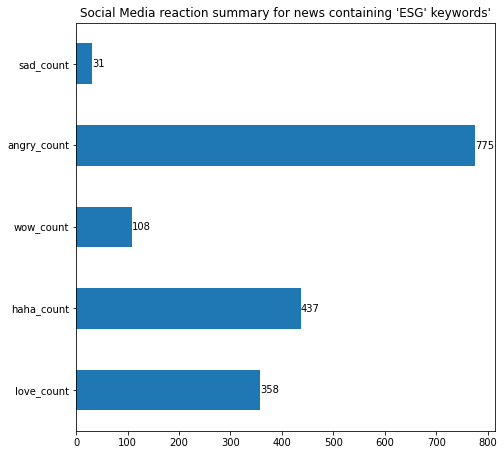

In [ ]:
ax= df[['love_count',	'haha_count',	'wow_count',	'angry_count',	'sad_count']].sum().plot.barh(title="Social Media reaction summary for news containing 'ESG' keywords'", figsize=(7.5, 7.5))
ax.bar_label(ax.containers[0])

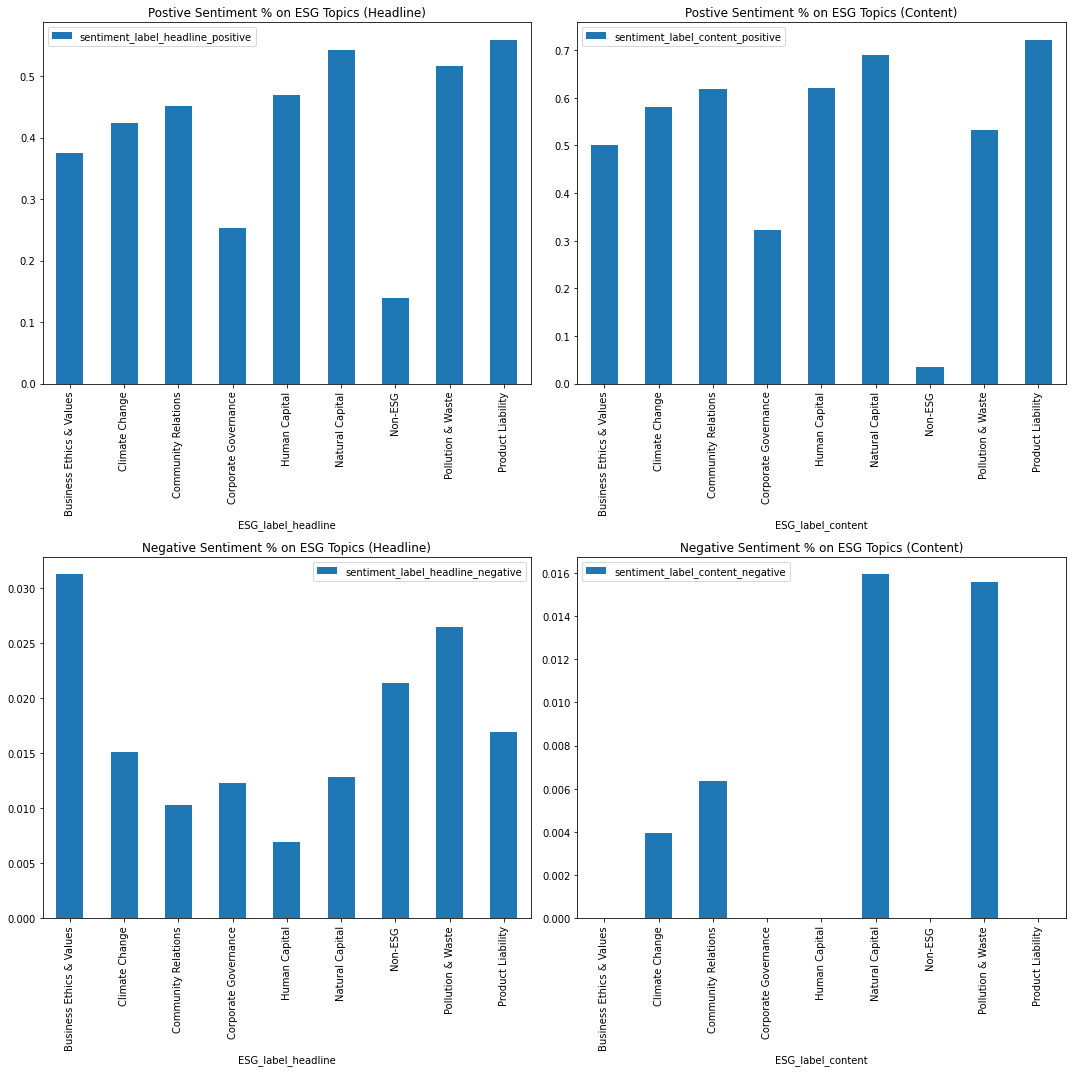

In [ ]:
unneeded= ['pubdate.1','pubdate','headline','content','tran_headline','tran_content','cleanText_headline','cleanText_content','sentiment_content','sentiment_headline','ESG_label_score_headline','ESG_label_score_content']
df_senti= df.drop(columns=unneeded)
df_senti_headline= pd.get_dummies(df_senti, columns=['sentiment_label_headline'])
df_senti_content= pd.get_dummies(df_senti, columns=['sentiment_label_content'])

df_senti_headline_result= df_senti_headline.groupby(by='ESG_label_headline').sum()
df_senti_headline_result['sum']=df_senti_headline_result['sentiment_label_headline_negative']+df_senti_headline_result['sentiment_label_headline_neutral']+df_senti_headline_result['sentiment_label_headline_positive']
df_senti_headline_result['sentiment_label_headline_negative']=df_senti_headline_result['sentiment_label_headline_negative']/df_senti_headline_result['sum']
df_senti_headline_result['sentiment_label_headline_neutral']=df_senti_headline_result['sentiment_label_headline_neutral']/df_senti_headline_result['sum']
df_senti_headline_result['sentiment_label_headline_positive']=df_senti_headline_result['sentiment_label_headline_positive']/df_senti_headline_result['sum']

df_senti_content_result= df_senti_content.groupby(by='ESG_label_content').sum()
df_senti_content_result['sum']=df_senti_content_result['sentiment_label_content_negative']+df_senti_content_result['sentiment_label_content_neutral']+df_senti_content_result['sentiment_label_content_positive']
df_senti_content_result['sentiment_label_content_negative']=df_senti_content_result['sentiment_label_content_negative']/df_senti_content_result['sum']
df_senti_content_result['sentiment_label_content_neutral']=df_senti_content_result['sentiment_label_content_neutral']/df_senti_content_result['sum']
df_senti_content_result['sentiment_label_content_positive']=df_senti_content_result['sentiment_label_content_positive']/df_senti_content_result['sum']

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
df_senti_headline_result.drop(columns='sum')[['sentiment_label_headline_positive']].plot.bar(ax=ax[0,0], title='Postive Sentiment % on ESG Topics (Headline)')
df_senti_headline_result.drop(columns='sum')[['sentiment_label_headline_negative']].plot.bar(ax=ax[1,0], title='Negative Sentiment % on ESG Topics (Headline)')
df_senti_content_result.drop(columns='sum')[['sentiment_label_content_positive']].plot.bar(ax=ax[0,1], title='Postive Sentiment % on ESG Topics (Content)')
df_senti_content_result.drop(columns='sum')[['sentiment_label_content_negative']].plot.bar(ax=ax[1,1], title='Negative Sentiment % on ESG Topics (Content)')
plt.tight_layout()
plt.show()

# Keywords Analysis by news content sentiment

[Text(0, 0, '30'), Text(0, 0, '2296'), Text(0, 0, '3000')]

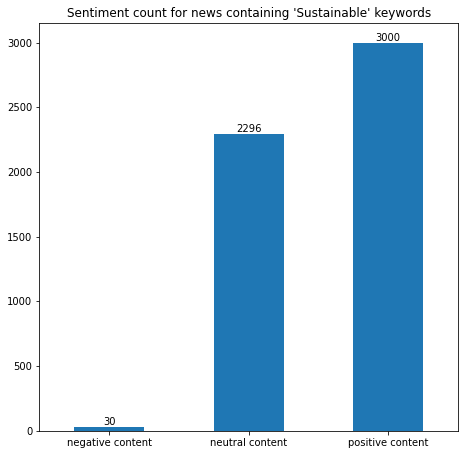

In [ ]:
ax= pd.get_dummies(df_senti, columns=['sentiment_label_content']).rename(columns= {'sentiment_label_content_negative': "negative content", 'sentiment_label_content_neutral': "neutral content", "sentiment_label_content_positive": 'positive content'})[['negative content','neutral content','positive content']].sum().plot.bar(title="Sentiment count for news containing 'Sustainable' keywords", figsize=(7.5, 7.5),rot=0)
ax.bar_label(ax.containers[0])